<h2 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold">Import Libraries 🔖 </h2>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id ='1' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold">Vanishing Gradient Problem ❓</h3>

<p style = "color:black;font-family:Segoe Print;font-weight:bold" > Recurrent Neural Networks allows us to model time-bound and sequential data such as stock market prediction and machine translation, as we learned from our previous notebook.In the RNN notebook, we saw that our model made very good predictions up to a certain period of time, but when the time interval gets longer, its ability to predict decreases. </p>

<p style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > So what caused this? </p>

<p style = "color:black;font-family:Segoe Print;font-weight:bold" > When the number of layers starts to increase, the information from the previous layer becomes insignificant.actually this is called the gradient problem. RNNs are very complaining about this problem. gradients carry information used in RNN. When the gradients are very small, that is, when they begin to approach 0, the parameter update becomes insignificant and there is a loss of information between the layers. </p>

<p style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > In short, this information loss problem is called Vanishing Gradient Problem. Let's understand better what we are telling by visualizing it. </p>

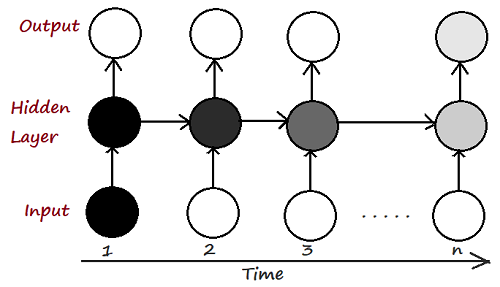

<ul>
  <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > you see a simple RNN model above. </li>
  <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > Think of black as information, and imagine that the information is lost as the color approaches white. </li>
    <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > At first, our color is black, and as the number of layers increases, the color starts to approach white, so the information begins to be lost.There is no problem for the first layers, but this problem starts to occur as the number of layers increases. </li>
</ul>


<a id ='2' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold">Exploding Gradient Problem ❓</h3>

<p style = "color:black;font-family:Segoe Print;font-weight:bold" > What did we say above? Updating doesn't matter as the gradients get smaller and eventually approach zero. Here the gradients get too big. It starts to be more than 1. This causes huge updates in training our neural network model. </p>

<p style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > This issue causes issues such as long training time, poor performance, and poor accuracy. </p>

<a id ='3' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold">Long Short-Term Memory Networks (LSTM) 📚</h3>

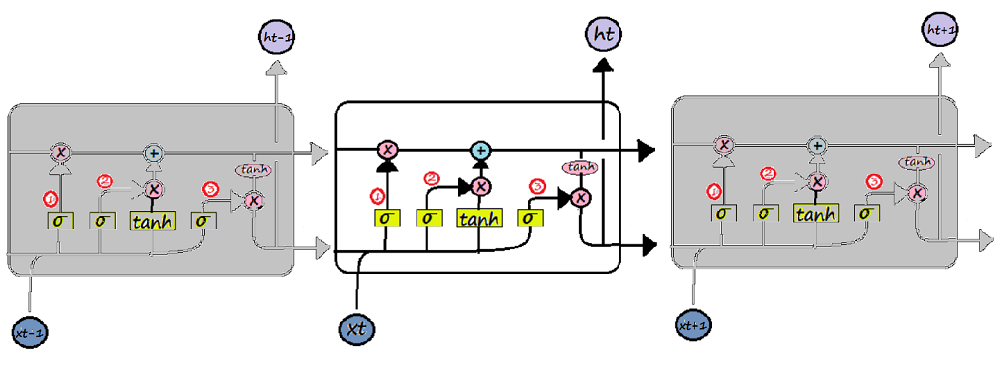

<p style = "color:black;font-family:Segoe Print;font-weight:bold" > We can say that the most popular and effective solution to the problems mentioned above is LSTM.</p>

<ul>
  <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > We can say that LSTMs are a special type of RNN. </p> </li>
      <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > The memory in RNNs is short lived. Memory in LSTM is long term. Thus, LSTM can also remember the long history. </p> </li>
</ul>

<p style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" >Let's try to understand the LSTM better by diving into a little more detail of the picture above.</p>

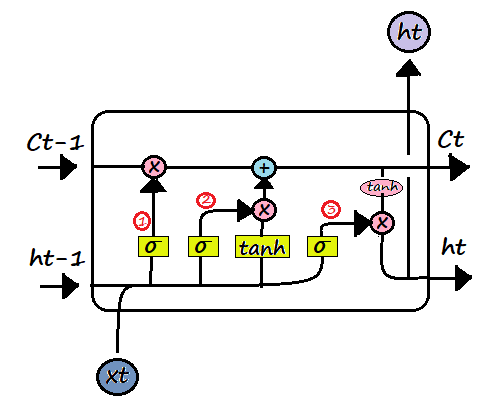

<ul>
  <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > x --> Indicates whether it will be included.  </p> </li>
      <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > + --> indicates that the incoming information has been collected. </p> </li>
      <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > α  --> You can think of them as our sigmoid layers.used to remember and forget something from memory.(0 or 1)  </p> </li>
      <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > tanh --> activation function.The reason why tanh is preferred here in general.It is effective against the disappearing gradient problem. We were taking derivatives while updating the parameters. The tanh derivative is preferred as it will not reach zero immediately.it does not slow down learning for a certain period of time. </p> </li>
          <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > ht-1 --> YOur entrance from the previous layer.  </p> </li>
      <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > Xt --> normal input value. </p> </li>
          <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > Ct-1 --> input from memory of previous LSTM unit. </p> </li>
          <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > Ct --> Information to be transmitted to the memory of the next LSTM unit. </p> </li>
          <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > ht --> Output of the LSTM unit. </p> </li>
              <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > ht --> Output of the LSTM unit. </p> </li>
                  <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > You can think of arrows as vector structures. (example: array) </p> </li>
        <li style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > Think of ht-1 and xt as two parallel paths. </p> </li>
</ul>

<a id ='4' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold">Long LSTM works in 3 important steps ❓</h3>

<ol>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > Forget Gate </p>  </li>
        <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > Input Gate </p>  </li>
        <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > Output Gate </p>  </li>
</ol>

<a id ='5' ></a>
<h4 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold"> 1 - Forget Gate ❓</h4>

<p style = "color:black;font-family:Segoe Print;font-weight:bold" > It takes xt and ht -1 as inputs. Decides whether the incoming information will be forgotten or not.it decides what information should be extracted in a given time frame. Sigmoid determines the operation here. It takes the inputs we specified and calculates the function. </p> 

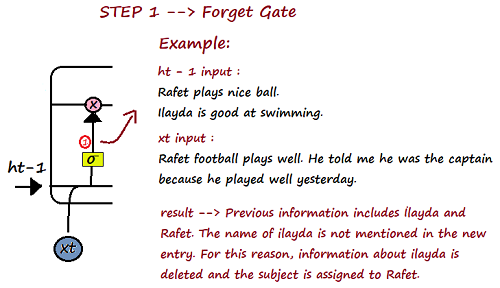


<a id ='6' ></a>
<h4 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold"> 2 - Input Gate  ❓</h4>

<p style = "color:black;font-family:Segoe Print;font-weight:bold" > It decides which information will be stored in memory or not.There are two sections in this second layer. One is the sigmoid part and the other is the tanh part. It is decided using the sigmoid function. tanh gives weight to the passing values according to their level of importance. </p> 

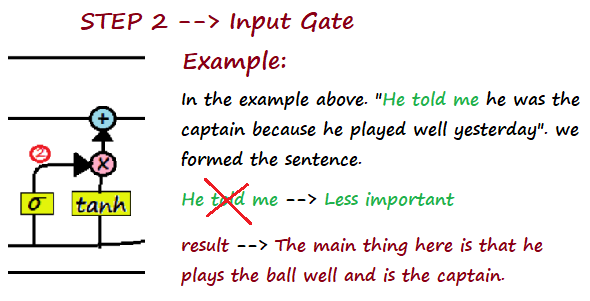

<a id ='7' ></a>
<h4 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold"> 3 - Output Gate  ❓</h4>

<p style = "color:black;font-family:Segoe Print;font-weight:bold" > Decides what information should be output or not.3. In the 3rd part, we use sigmoid to find out which sections will reach the output first. We then apply tanh to pull these values ​​between -1 and 1 and multiply them by the output of the sigmoid gate. </p> 

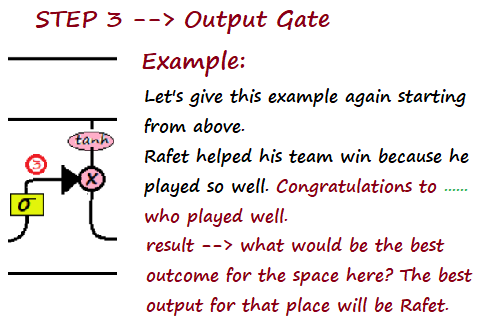

<a id ='8' ></a>
<h2 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > Load and Check Data 🗸</h2>

In [3]:
data = pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/tsla.us.txt")

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [5]:
print("Do you have a null column? \n", data.isna().sum())

Do you have a null column? 
 Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64


<a id ='9' ></a>
<h2 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > Data Preprocessing ❔</h2>

<p style = "color:darkred;font-family:Segoe Print;font-weight:bold"> In this section, we will make the data available for LSTM. </p>
<ul>
     <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Split the data as train and test</li>
     <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Normalize data.</li>
     <li style = "color:black;font-family:Segoe Print;font-weight:bold" >X_train - y_train ?</li>
    <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Reshape</li>
</ul>

<a id ='10' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > Split the data as train and test ❓</h3>

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >In this section, we will separate the data we have as a train and test. </p> </li>
</ul>

In [6]:
training_size = int(len(data)*0.80)
data_len = len(data)

train, test = data[0:training_size],data[training_size:data_len]

In [7]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  1486
total length of data -->  1858
Train length -->  1486
Test length -->  372


<a id ='11' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > Normalize data ❓</h3>

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >In this section, we will normalize the data we have.</p> </li>
</ul>

<a id ='12' ></a>
<p style = "color:darkred;font-family:Segoe Print;font-weight:bold" > Why do we normalize data? </p>

<ul>
        <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >Normalization is very important in all deep learning in general. </p> </li>
            <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >Normalization makes the properties more consistent. This allows the model to predict its output more accurately.</p> </li>
                <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >In this notebook, since we use the "open" feature from our data to train the model, it will be sufficient to normalize it.</p> </li>
</ul>

In [8]:
# the part of data that we will use as training.
train = train.loc[:, ["Open"]].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

<a id ='13' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > X_train - y_train ❓</h3>

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >We will separate the normalized data into x_train and y_train. </p> </li>
        <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >We will make this distinction 40 steps 40 steps. So we will train in 40 steps. We will anticipate step 41.didn't we understand Let's examine the picture below and visualize this in our minds. </p> </li>
</ul>

<a id ='14' ></a>
<p style = "color:darkred;font-family:Segoe Print;font-weight:bold" > What is the steps logic? </p>

<p style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > Detailed explanation -->  <a href = "https://youtu.be/ysYZMCxyPFs" > Stock Price Prediction using RNN </a> </p>

In [10]:
end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 40

for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

<a id ='15' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > Reshape ❓</h3>

<a id ='16' ></a>
<p style = "color:darkred;font-family:Segoe Print;font-weight:bold" > why do we reshape ?  </p>

<p style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > Detailed explanation -->  <a href = "https://youtu.be/ysYZMCxyPFs" > Stock Price Prediction using RNN </a> </p>


In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train --> ", X_train.shape)
print("y_train shape --> ", y_train.shape)

X_train -->  (1446, 40, 1)
y_train shape -->  (1446,)


<a id ='17' ></a>
<h2 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold">Implementing with Keras ❔ </h2>

<p style = "color:darkred;font-family:Segoe Print;font-weight:bold"> In this section, we create and fit  LSTM model. </p>
<ul>
    <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Create Model</li>
    <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Compile Model</li>
    <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Epochs and Batch Size</li>
    <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Fit the model</li>
</ul>

<a id ='18' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > Create Model❓</h3>

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >We are importing the libraries we will use for our model.</p> </li>
        <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >Later, we will create our LSTM model.</p> </li>
</ul>

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

<a id ='19' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > Compile Model❓</h3>

<p style = "color:black;font-family:Segoe Print;font-weight:bold" > Yes, now we need to compile our model.  </p>

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" >optimizer --> The optimizer does the process of updating our parameters for us here. some kind of healer I can say. There are methods used for multiple optimizers, and you should choose the most suitable one for the model. </li>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" >loss --> It is a number that indicates how good or bad the model is to its prediction. As it approaches 0, the error starts to decrease.</li>
</ul>

In [14]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

<a id ='20' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > Epochs and Batch Size ❓</h3> 

<ul>
    <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Epochs : the forward and backward processing of data one by one. In other words, we can simply call it a complete educational tour. Education is determined by the number of eras. </li>
        <li style = "color:black;font-family:Segoe Print;font-weight:bold" >Batch Size : Basically, in the periods I mentioned above, it takes a long time for us to train the data one by one. During training
how much of the data,indicates that it will be trained. </li>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" >To give an example of this, imagine we have 10 loaves of bread. If we select batch_size as 2, imagine that we eat these breads 2 times and 2 times.</li>  
</ul>

In [15]:
epochs = 100 
batch_size = 20

<a id ='21' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > Fit the model ❓</h3> 

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >We train the model we created above using our data. </p> </li>
</ul>

In [16]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
73/73 [==============================] - 13s 84ms/step - loss: 0.0625
Epoch 2/100
73/73 [==============================] - 6s 81ms/step - loss: 0.0066
Epoch 3/100
73/73 [==============================] - 6s 84ms/step - loss: 0.0053
Epoch 4/100
73/73 [==============================] - 6s 84ms/step - loss: 0.0063
Epoch 5/100
73/73 [==============================] - 6s 83ms/step - loss: 0.0048
Epoch 6/100
73/73 [==============================] - 6s 85ms/step - loss: 0.0051
Epoch 7/100
73/73 [==============================] - 6s 82ms/step - loss: 0.0042
Epoch 8/100
73/73 [==============================] - 6s 82ms/step - loss: 0.0042
Epoch 9/100
73/73 [==============================] - 6s 80ms/step - loss: 0.0046
Epoch 10/100
73/73 [==============================] - 6s 81ms/step - loss: 0.0039
Epoch 11/100
73/73 [==============================] - 6s 82ms/step - loss: 0.0041
Epoch 12/100
73/73 [==============================] - 6s 82ms/step - loss: 0.0039
Epoch 13/100
73/73 [====

<a id ='22' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > Predict ❓</h3> 

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >We will make predictions using the model we have created.</p> </li>
</ul>

In [17]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


<ul>
    <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" > We use the data we separated above as our test data. </p> </li>
</ul>

In [18]:
real_price = test.loc[:, ["Open"]].values
print("Real Price Shape --> ", real_price.shape)

Real Price Shape -->  (372, 1)


<ul>
    <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >Since we use the "open" feature while training the model, we will use the same feature while testing. </p> </li>
</ul>

In [19]:
dataset_total = pd.concat((data["Open"], test["Open"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)

<ul>
    <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >we distinguish the values ​​that I will guess. </p> </li>
</ul>

In [20]:
X_test = []

for i in range(timesteps, 412):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)

print("X_test shape --> ", X_test.shape)

X_test shape -->  (372, 40)


<ul>
    <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >Finally, we trained our model according to the steps above. We generate our test data based on this number of steps. </p> </li>
</ul>

In [21]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict = regressor.predict(X_test)
predict = scaler.inverse_transform(predict)

<ul>
    <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >We can now make an estimate here as data is ready to predict. </p> </li>
        <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >inverse_transform --> If you remember before training our model, we normalized our data. converts these values ​​to before normalization. </p> </li>
</ul>

<a id ='23' ></a>
<h3 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold" > Evaluate the model ❔</h3> 

<ul>
    <li style = "color:darkblue;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Segoe Print;font-weight:bold" >yes, finally let's take a look at our results by comparing our predictions with real data. </p> </li>
</ul>

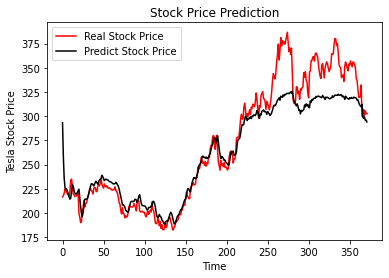

In [22]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(predict, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

<a id ='24' ></a>
<h4 style = "background:#0C0C0C ;color:white;border:0;font-family:Segoe Print;font-weight:bold"> CONCLUSION</h4>

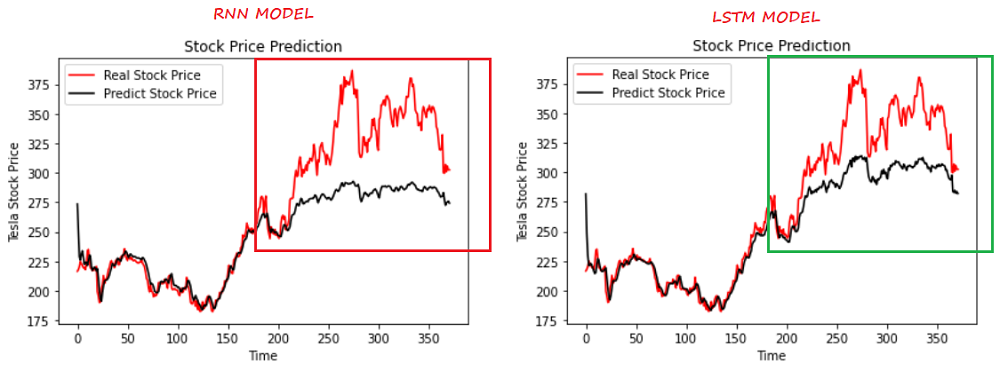

<p style = "color:darkgreen;font-family:Segoe Print;font-weight:bold" > You see the difference in success in long-term predictions between the RNN model and the LSTM model.We would make a better model by changing the parameters by playing with the model a little more.However, I wanted the parameters to be the same with the RNN notebook we wrote earlier in order to be able to compare them better.</p>
